In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
bh = pd.read_csv('/content/Boston_housing.csv')
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
bh.rename(columns={'MEDV':'Price'}, inplace=True)

In [4]:
bh.shape

(506, 14)

In [5]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
crim = bh.CRIM.mean()
bh.CRIM.fillna(crim, inplace = True)

In [7]:
zn = bh.ZN.mean()
bh.ZN.fillna(zn, inplace = True)

In [8]:
indus = bh.INDUS.mean()
bh.INDUS.fillna(indus, inplace = True)

In [9]:
chas = bh.CHAS.mean()
bh.CHAS.fillna(chas, inplace = True)

In [10]:
age = bh.AGE.mean()
bh.AGE.fillna(age, inplace = True)

In [11]:
lstat = bh.LSTAT.mean()
bh.LSTAT.fillna(lstat, inplace = True)

In [12]:
bh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


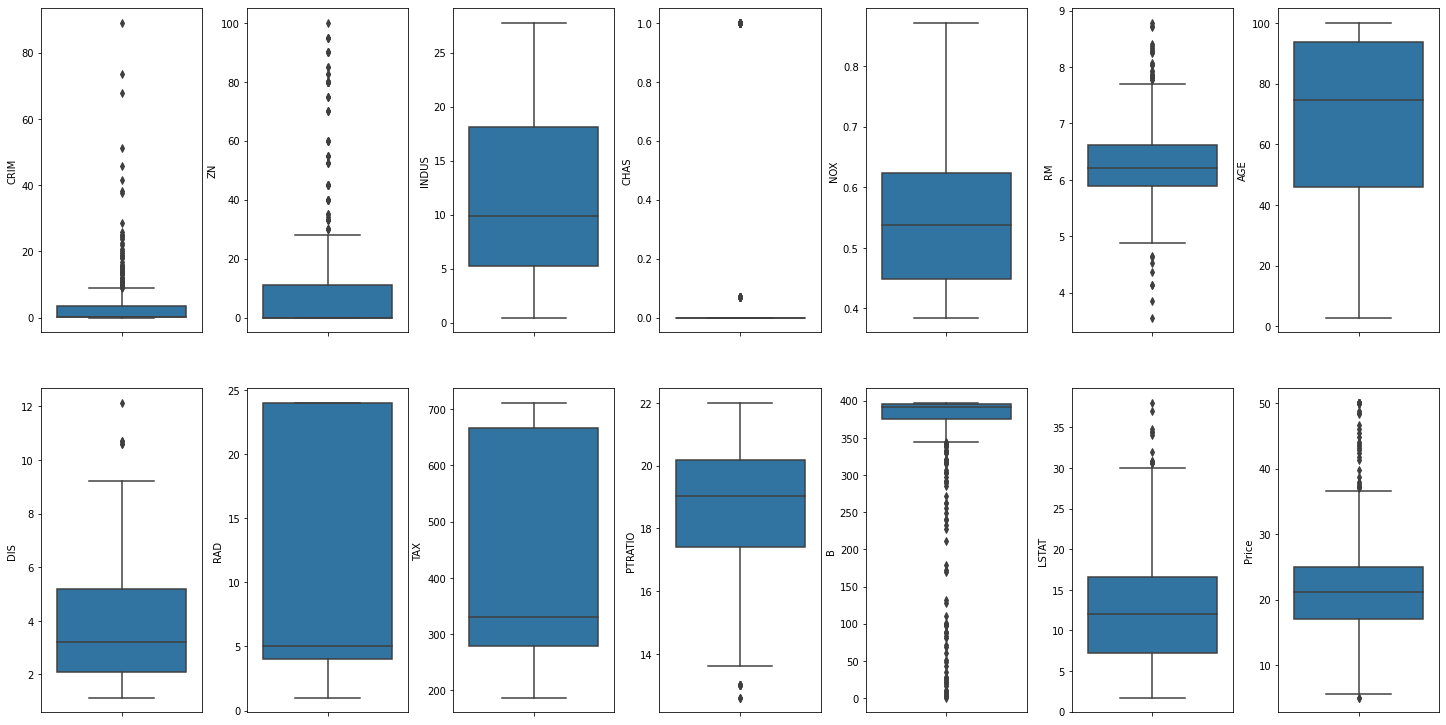

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bh.items():
    sns.boxplot(y=k, data=bh, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Looking for the Outliers in the Dataset**

In [15]:
for k, v in bh.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(bh)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column Price outliers = 7.91%


**Let's reduce MEDV(Price) outliers (MEDV = 50.0) before plotting more distributions**



In [ ]:
bh = bh[~(bh['Price'] >= 50.0)]
print(np.shape(bh))

(490, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

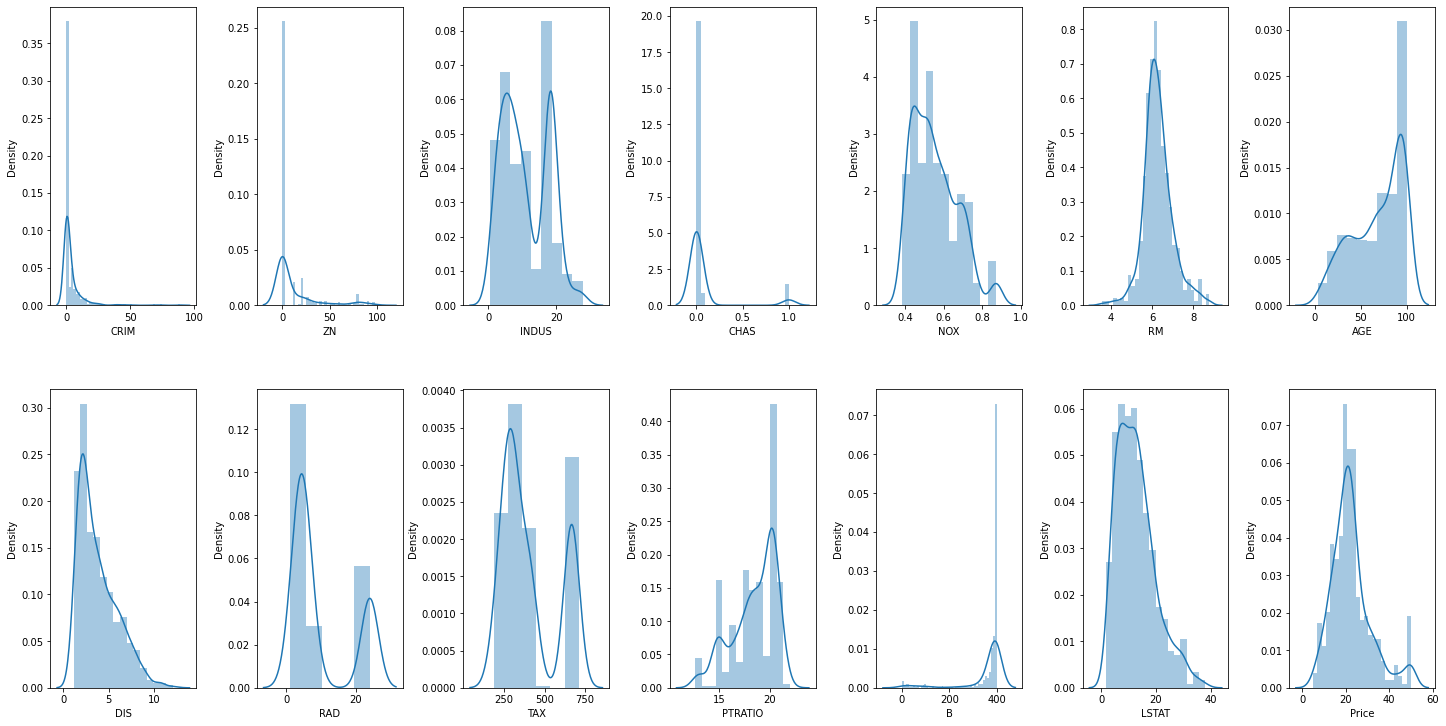

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bh.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


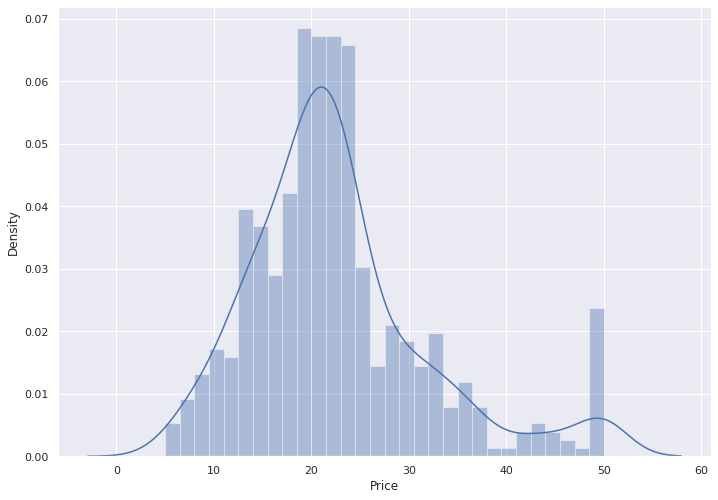

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bh['Price'], bins=30)
plt.show()

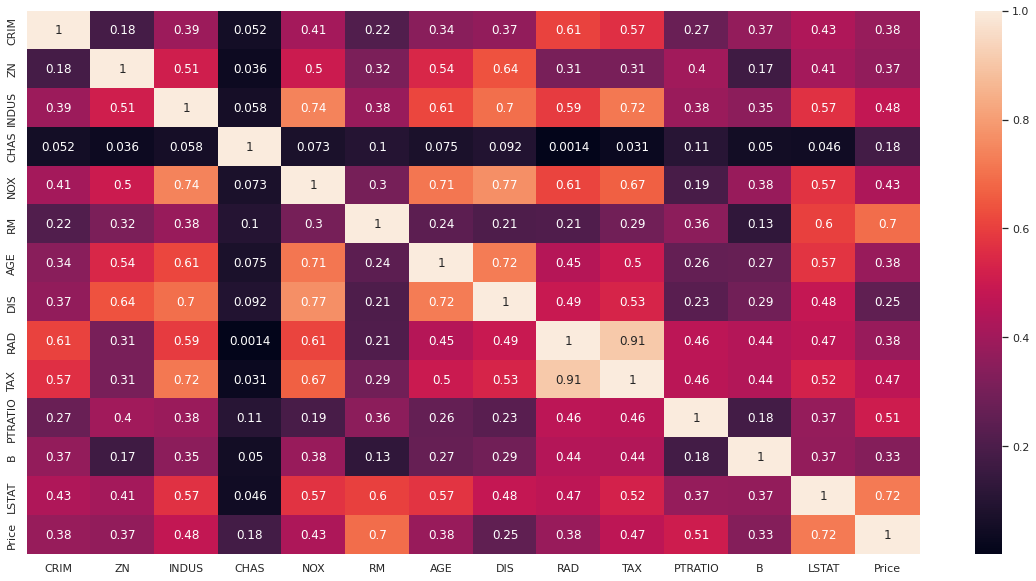

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(bh.corr().abs(),  annot=True)

In [19]:
bh.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

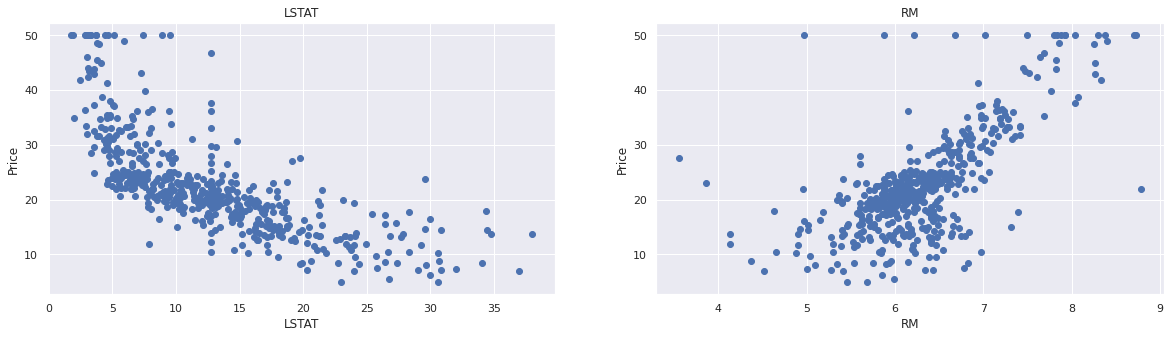

In [20]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bh['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bh[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [21]:
data = pd.DataFrame(np.c_[bh['LSTAT'], bh['RM']], columns = ['LSTAT','RM'])
label = bh['Price']

In [22]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(data, label, test_size = 0.2, random_state=5)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# **Linear Regression**

In [24]:
lr = LinearRegression()
lr.fit(train_data, train_label)

LinearRegression()

In [58]:
y_pred = lr.predict(test_data)
linear_acc = r2_score(test_label, y_pred)
y_pred

array([30.9227546 , 29.76801998, 25.86150344,  0.39071739, 33.5488095 ,
        8.0060487 , 30.77166088, 27.87970554, 26.34686712, 22.0648174 ,
       32.50063855, 23.13289284, 22.90908783, 31.11647135, 27.20058017,
       20.65962504, -0.66485824, 17.85747707, 12.27712728, 21.7775462 ,
        4.85965059, 24.0249709 , 38.0238396 , 24.60610307, 29.75985095,
       12.64849949, 27.0251774 , 21.96389723, 27.57147698, 28.96878917,
       11.52183199, 10.40749441, 18.02557698, 24.99024655, 26.33458828,
       23.00427877, 26.37801438, 12.42951771, 37.41677401, 33.56951219,
       20.32395144,  1.18633076, 27.67626345, 16.58758988, 27.49192748,
       29.96539903, -3.01941326, 17.27301607, 20.73321333, 13.92698001,
       20.76425867, 21.46461313, 25.14070121, 16.2314685 , 17.56285193,
       27.83036932, 36.28005256, 19.84346182, 28.89751054, 20.42493377,
       20.1152955 , 23.04159099, 16.50398149, 31.34953228, 22.59493201,
       13.04099902, 23.43777569, 25.83234327, 22.91934571, 21.54

In [26]:
print("Linear Regression model's accuray is ",lr.score(test_data, test_label)*100)

Linear Regression model's accuray is  66.32454421501063


In [27]:
df = pd.DataFrame({"Actual" : test_label,"predict" : y_pred})
df

,Actual,predict
226,37.6,30.922755
292,27.9,29.768020
90,22.6,25.861503
373,13.8,0.390717
273,35.2,33.548809
...,...,...
349,26.6,25.631069
212,22.4,17.865527
156,13.1,15.217026
480,23.0,23.666693


In [28]:
# model evaluation for training set
label_train_predict = lr.predict(train_data)
rmse = (np.sqrt(mean_squared_error(train_label, label_train_predict)))
r2 = r2_score(train_label, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = lr.predict(test_data)
rmse = (np.sqrt(mean_squared_error(test_label, label_test_predict)))
r2 = r2_score(test_label, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.742098839050517
R2 score is 0.616169412112803


The model performance for testing set
--------------------------------------
RMSE is 5.134765538745577
R2 score is 0.6632454421501064


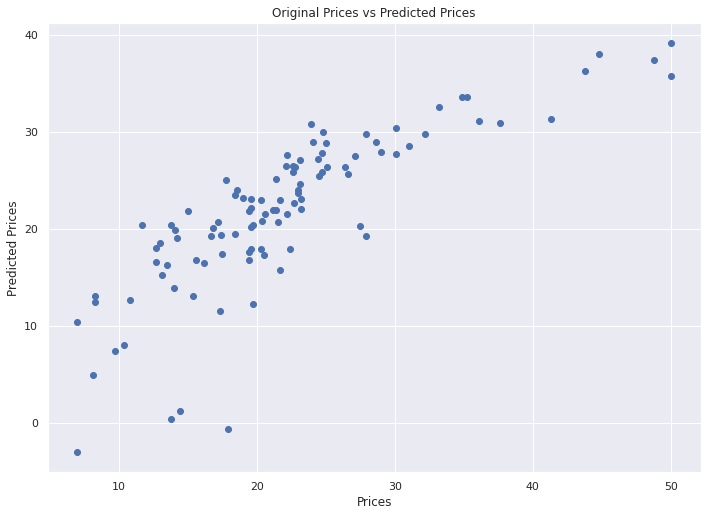

In [29]:
plt.scatter(test_label, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Original Prices vs Predicted Prices")
plt.show()

**Checking residuals**

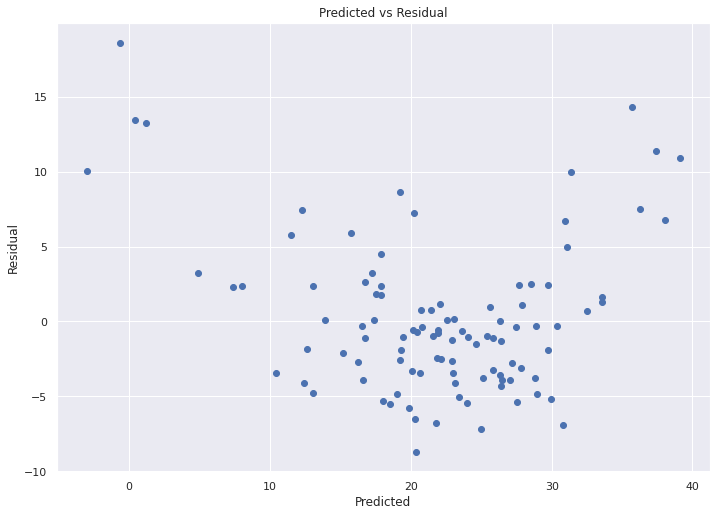

In [30]:
plt.scatter(y_pred, test_label-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Predicted vs Residual")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


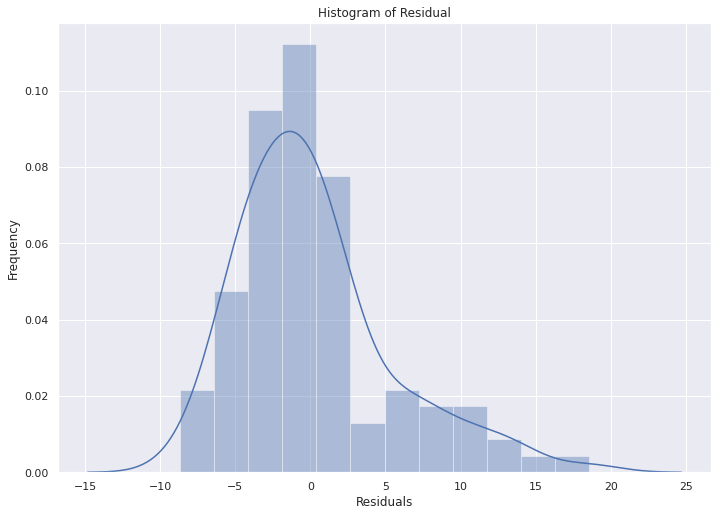

In [31]:
# checking the normality of errors

sns.distplot(test_label-y_pred)
plt.title("Histogram of Residual")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# **Random Forest Regression**

In [60]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rfr.fit(train_data, train_label)  

RandomForestRegressor(random_state=0)

In [77]:
y_pred = rfr.predict(test_data)
random_acc = r2_score(test_label, y_pred)
y_pred

array([41.136, 26.876, 22.897,  9.62 , 43.23 , 13.743, 29.315, 24.825,
       22.87 , 17.178, 33.67 , 22.991, 22.535, 34.013, 21.879, 20.748,
        9.37 , 18.587, 13.701, 21.053, 17.702, 22.786, 44.679, 21.311,
       29.927, 11.731, 23.795, 22.077, 24.469, 28.024, 10.438, 18.064,
       18.582, 21.527, 22.055, 21.82 , 32.936, 11.353, 46.265, 39.188,
       16.792,  8.902, 24.593, 22.056, 24.972, 28.468,  9.99 , 19.58 ,
       20.638, 12.151, 20.585, 20.534, 24.351, 10.863, 17.151, 24.837,
       47.07 , 13.349, 25.843, 21.617, 20.003, 21.629, 15.289, 33.446,
       21.644, 15.513, 21.673, 23.677, 22.381, 21.485, 14.447, 23.328,
       16.638, 15.583, 18.379, 28.05 , 19.16 , 13.677, 30.366, 18.403,
       21.658, 44.46 , 12.894, 16.954, 20.652, 15.717, 17.749, 13.215,
       18.305, 19.998, 44.64 , 21.538, 23.033, 16.566, 23.323, 27.012,
       16.668, 28.643, 17.611, 15.834, 21.939, 35.385])

In [62]:
print("Random Forest Regression model's accuray is ",rfr.score(test_data, test_label)*100)

Random Forest Regression model's accuray is  76.72510151516741


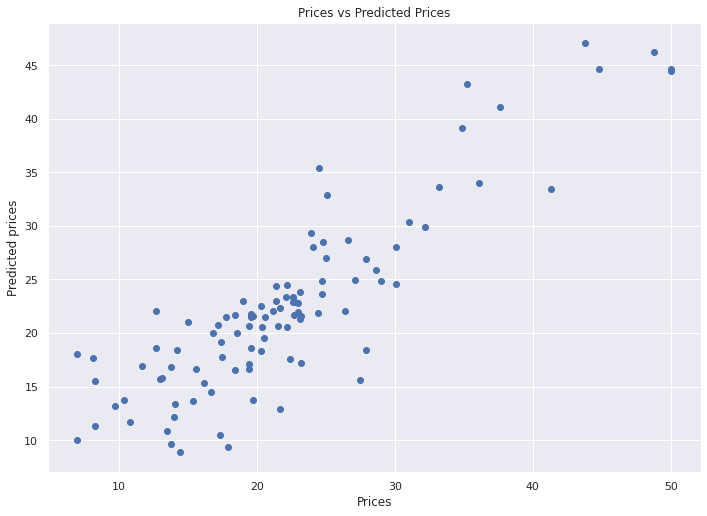

In [63]:
plt.scatter(test_label, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [64]:
df = pd.DataFrame({"Actual" : test_label,"predict" : y_pred})
df

,Actual,predict
226,37.6,41.136
292,27.9,26.876
90,22.6,22.897
373,13.8,9.620
273,35.2,43.230
...,...,...
349,26.6,28.643
212,22.4,17.611
156,13.1,15.834
480,23.0,21.939


In [65]:
# model evaluation for training set
label_train_predict = rfr.predict(train_data)
rmse = (np.sqrt(mean_squared_error(train_label, label_train_predict)))
r2 = r2_score(train_label, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = rfr.predict(test_data)
rmse = (np.sqrt(mean_squared_error(test_label, label_test_predict)))
r2 = r2_score(test_label, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.9363242085441332
R2 score is 0.9563529994538787


The model performance for testing set
--------------------------------------
RMSE is 4.268819328665047
R2 score is 0.767251015151674


# **XGBoost Regression**

In [66]:
gb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)

gb.fit(train_data, train_label)

[19:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=1000)

In [67]:
y_pred = gb.predict(test_data)
xgboost_acc = r2_score(test_label, y_pred)
y_pred

array([46.15882 , 27.087376, 21.191717, 10.756885, 43.93096 ,  9.923676,
       30.681822, 26.297424, 22.518154, 18.639925, 31.895378, 23.155092,
       22.33559 , 33.652374, 23.166079, 20.68366 , 10.74565 , 21.833433,
       13.960617, 21.34002 , 20.6161  , 22.79559 , 45.713593, 21.5699  ,
       29.649061, 12.707569, 24.197105, 23.564749, 24.48092 , 25.893177,
       11.747346, 19.068779, 17.51107 ,  9.328869, 20.055555, 21.837786,
       25.86315 , 12.070394, 47.837738, 42.414658, 16.604527,  8.8155  ,
       25.109232, 20.195942, 24.978073, 27.125698, 13.29469 , 19.268343,
       20.796442, 15.115225, 20.796442, 19.95705 , 26.092611, 11.548251,
       17.48035 , 23.927156, 44.4909  , 13.692663, 27.379936, 20.072508,
       19.511068, 21.29671 , 12.544543, 33.633244, 20.940315, 15.945835,
       20.118109, 24.089422, 22.550232, 20.634401, 14.425072, 23.297125,
       20.872324, 12.547058, 21.617691, 28.995703, 28.236187, 12.802722,
       33.032467, 19.17012 , 21.732805, 46.033436, 

In [68]:
print("XGBoost model's accuray is ",gb.score(test_data, test_label)*100)

XGBoost model's accuray is  74.4167111407267


In [69]:
df = pd.DataFrame({"Actual" : test_label,"predict" : y_pred})
df

,Actual,predict
226,37.6,46.158821
292,27.9,27.087376
90,22.6,21.191717
373,13.8,10.756885
273,35.2,43.930962
...,...,...
349,26.6,26.268969
212,22.4,16.848616
156,13.1,17.316229
480,23.0,22.530693


In [70]:
# model evaluation for training set
label_train_predict = gb.predict(train_data)
rmse = (np.sqrt(mean_squared_error(train_label, label_train_predict)))
r2 = r2_score(train_label, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = gb.predict(test_data)
rmse = (np.sqrt(mean_squared_error(test_label, label_test_predict)))
r2 = r2_score(test_label, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.4201683740766597
R2 score is 0.9765210901778956


The model performance for testing set
--------------------------------------
RMSE is 4.475505177042322
R2 score is 0.744167111407267


# **K-Neighbors Regressor**

In [71]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_data, train_label)

KNeighborsRegressor()

In [72]:
y_pred = knn.predict(test_data)
knn_acc = r2_score(test_label, y_pred)
y_pred

array([32.16, 28.96, 22.8 , 10.24, 35.18, 13.5 , 30.48, 24.72, 23.98,
       17.02, 32.3 , 21.52, 21.8 , 32.54, 23.82, 18.96, 10.24, 19.42,
       13.26, 20.86, 14.58, 22.82, 46.18, 20.74, 31.14, 14.08, 23.2 ,
       22.88, 26.4 , 29.12, 12.2 , 15.18, 17.54, 14.28, 22.88, 19.46,
       25.6 , 13.18, 34.04, 43.96, 17.28, 10.24, 25.  , 20.32, 24.68,
       27.14, 10.24, 16.58, 19.6 , 13.4 , 19.6 , 21.9 , 21.98, 11.52,
       18.08, 26.74, 47.34, 13.68, 23.98, 21.56, 17.82, 20.44, 17.28,
       32.2 , 21.56, 15.04, 19.1 , 23.16, 22.22, 20.28, 17.3 , 24.58,
       17.52, 12.18, 16.64, 28.68, 18.52, 13.7 , 22.26, 17.88, 22.28,
       48.56, 12.9 , 17.28, 21.34, 17.14, 19.72, 13.38, 17.76, 18.96,
       40.06, 21.22, 21.46, 17.  , 24.7 , 26.88, 16.46, 27.08, 18.84,
       17.52, 21.76, 29.76])

In [73]:
print("K-Neighbors model's accuray is ",knn.score(test_data, test_label)*100)

K-Neighbors model's accuray is  74.48933536553994


In [74]:
df = pd.DataFrame({"Actual" : test_label,"predict" : y_pred})
df

,Actual,predict
226,37.6,32.16
292,27.9,28.96
90,22.6,22.80
373,13.8,10.24
273,35.2,35.18
...,...,...
349,26.6,27.08
212,22.4,18.84
156,13.1,17.52
480,23.0,21.76


In [75]:
# model evaluation for training set
label_train_predict = knn.predict(train_data)
rmse = (np.sqrt(mean_squared_error(train_label, label_train_predict)))
r2 = r2_score(train_label, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = knn.predict(test_data)
rmse = (np.sqrt(mean_squared_error(test_label, label_test_predict)))
r2 = r2_score(test_label, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.9601438867748726
R2 score is 0.817433880257893


The model performance for testing set
--------------------------------------
RMSE is 4.46914827170791
R2 score is 0.7448933536553994


In [80]:
models = pd.DataFrame({
    'Models': ['Linear Regression', 'Random Forest Regressor', 'XGBoost', 'K-Neighbors Regressor'],
    'R2 Score': [linear_acc*100, random_acc*100, xgboost_acc*100, knn_acc*100]})
models.sort_values(by='R2 Score', ascending=False)

,Models,R2 Score
1,Random Forest Regressor,76.725102
3,K-Neighbors Regressor,74.489335
2,XGBoost,74.416711
0,Linear Regression,66.324544


# **Random Forest Regressor give the high accuracy**